# Cifar-100 이미지 분류
## 전체 데이터 사용
### 모델 출처: [Divya Agarwal](https://github.com/divya025/Cifar100)

#### CIFAR100 데이터 로드

In [1]:
from keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

Using TensorFlow backend.


In [2]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
y_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

#### 데이터 확인

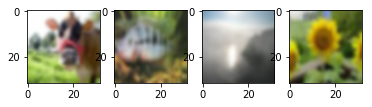

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [5]:
y_train[0], y_train[4], y_train[8], y_train[12]

(array([19]), array([1]), array([23]), array([82]))

#### 자료형 변환 및 스케일링
- X: 실수형으로 정규화
- Y: 1-hot encoding

In [6]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [7]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, 100)
Y_test = np_utils.to_categorical(y_test, 100)
Y_train[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

#### 모형 구현

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Activation
import numpy as np

np.random.seed(0)

In [11]:
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
# MAXPOOL Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# CONV2D Layer 2
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# Add a dropout of 10%
model.add(Dropout(0.1))
# CONV2D Layer 3
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 3
model.add(MaxPooling2D(pool_size=(2,2)))
# Add dropout of 25%
model.add(Dropout(0.25))
# flatten 
model.add(Flatten())
# Fully Connected Layer 1
model.add(Dense(512))
model.add(Activation('relu'))
# Adding a dropout of 50%
model.add(Dropout(0.5))
# Output Layer (Fully Connected Layer 2) 
model.add(Dense(100))
model.add(Activation('softmax'))
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
activation_9 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_10 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [12]:
import keras
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [13]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=50, 
                    validation_data=(X_test, Y_test), verbose=1)

W0821 10:22:14.924426  1548 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 83s 2ms/step - loss: 4.3612 - acc: 0.0410 - val_loss: 3.9479 - val_acc: 0.1095
Epoch 2/100
50000/50000 [==============================] - 82s 2ms/step - loss: 3.8758 - acc: 0.1094 - val_loss: 3.5858 - val_acc: 0.1743
Epoch 3/100
50000/50000 [==============================] - 83s 2ms/step - loss: 3.6397 - acc: 0.1467 - val_loss: 3.3877 - val_acc: 0.2045
Epoch 4/100
50000/50000 [==============================] - 83s 2ms/step - loss: 3.4731 - acc: 0.1761 - val_loss: 3.2394 - val_acc: 0.2278
Epoch 5/100
50000/50000 [==============================] - 83s 2ms/step - loss: 3.3322 - acc: 0.2001 - val_loss: 3.1060 - val_acc: 0.2558
Epoch 6/100
50000/50000 [==============================] - 84s 2ms/step - loss: 3.2209 - acc: 0.2205 - val_loss: 3.0098 - val_acc: 0.2802
Epoch 7/100
50000/50000 [==============================] - 82s 2ms/step - loss: 3.1376 - acc: 0.2336 - val_loss: 2.9286 - 

50000/50000 [==============================] - 84s 2ms/step - loss: 1.5607 - acc: 0.5619 - val_loss: 1.9788 - val_acc: 0.4852
Epoch 60/100
50000/50000 [==============================] - 86s 2ms/step - loss: 1.5443 - acc: 0.5677 - val_loss: 1.9795 - val_acc: 0.4852
Epoch 61/100
50000/50000 [==============================] - 83s 2ms/step - loss: 1.5324 - acc: 0.5676 - val_loss: 1.9730 - val_acc: 0.4868
Epoch 62/100
50000/50000 [==============================] - 83s 2ms/step - loss: 1.5121 - acc: 0.5724 - val_loss: 1.9799 - val_acc: 0.4899
Epoch 63/100
50000/50000 [==============================] - 84s 2ms/step - loss: 1.5004 - acc: 0.5772 - val_loss: 1.9791 - val_acc: 0.4902
Epoch 64/100
50000/50000 [==============================] - 85s 2ms/step - loss: 1.4852 - acc: 0.5804 - val_loss: 1.9748 - val_acc: 0.4895
Epoch 65/100
50000/50000 [==============================] - 85s 2ms/step - loss: 1.4688 - acc: 0.5835 - val_loss: 1.9745 - val_acc: 0.4858
Epoch 66/100
50000/50000 [==============

#### 모델 평가하기

In [14]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 3s 349us/step

 Test Accuracy: 0.5007


#### 그래프 그리기

In [15]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_acc']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['acc']

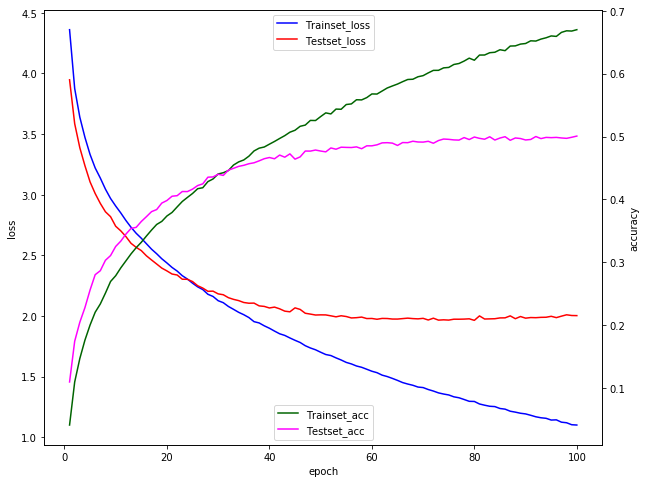

In [16]:
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()

#### 모델 저장하기

In [18]:
model.save_weights('model/cifar100-full-v2.h5') 